# one

In [ ]:
from music21 import converter, environment

In [ ]:
us = environment.UserSettings()
print(us['musescoreDirectPNGPath'])

In [ ]:
us['midiPath']

In [ ]:
s = converter.parse('tinyNotation: 4/8 C4_hi D-4 E#4 F8 trip{G4 A4 B4} c4')
s.show('midi')

In [ ]:
us.getSettingsPath()

In [ ]:
type(s.show('midi'))

In [ ]:
s = '[[73, 16],[74, 16],[75, 8],[0, 8],[78, 4]]'

In [ ]:
import ast

In [ ]:
res = ast.literal_eval(s)

In [ ]:
res[0][0]

# Two

In [ ]:
# return predictions from sample
sample = X_norm[0].reshape(1, length, 2)
pitch_pred, duration_pred = model.predict(sample)

# get log of predictions
pitch_pred = np.log(pitch_pred[0]) / 1.0  # diversity?
duration_pred = np.log(duration_pred[0])

# un-log predictions (not sure why we logged them...)
exp_pitch_preds = np.exp(pitch_pred)
exp_duration_preds = np.exp(duration_pred)

# make odds of all predictions = 1.0
pitch_pred = exp_pitch_preds / np.sum(exp_pitch_preds)
duration_pred = exp_duration_preds / np.sum(exp_duration_preds)

# get top 3 pitch predictions and top 2 duration predictions
pitch_index_top_3 = np.argpartition(pitch_pred, -3)[-3:]
dur_index_top_2 = np.argpartition(duration_pred, -2)[-2:]

# return three notes as [pitch, duration] pairs
three_notes = [[pitch, np.random.choice(dur_index_top_2)] for pitch in pitch_index_top_3]
three_notes_mapped = [[pitch_reverse_mapping[pitch], reverse_len_in_64th_notes[duration_reverse_mapping[duration]]] for pitch, duration in three_notes]

three_notes_mapped

# Midi to dataframe

tons of midi files
https://www.kunstderfuge.com/mozart.htm

In [ ]:
import music21

music21.corpus.getComposer('mozart')

In [ ]:
k155_m1 = open('/Users/mizukinakano/.pyenv/versions/3.8.12/envs/CoolMelodyProject/lib/python3.8/site-packages/music21/corpus/mozart/k155/movement1.mxl')

In [ ]:
k155_m1

In [ ]:
!pip install git+https://github.com/vishnubob/python-midi.git@feature/python3

pip install git+https://github.com/TaylorPeer/midi-to-dataframe

In [1]:
from midi_to_dataframe import NoteMapper, MidiReader, MidiWriter

In [2]:
!pwd

/Users/mizukinakano/code/sevans47/CoolMelodyProject/notebooks


In [9]:
note_mapping_config_path = "/Users/mizukinakano/code/sevans47/json/config/map-to-group.json"
note_mapper = NoteMapper(note_mapping_config_path)

In [14]:
path = '/Users/mizukinakano/code/sevans47/piano_sonata_310_1_(c)oguri.midi'

In [15]:
midi_file = path
reader = MidiReader(note_mapper)
df = reader.convert_to_dataframe(midi_file)

In [21]:
df[df['notes']!='rest']

,timestamp,bpm,time_signature,measure,beat,notes
22,1320,122.000069,4/4,2,2.50,"piano_d#6_0.25,piano_e5_0.25,piano_c5_0.25,pia..."
24,1440,122.000069,4/4,2,3.00,"piano_e5_0.25,piano_a4_0.25,piano_c5_0.25"
26,1560,122.000069,4/4,2,3.50,"piano_e5_0.25,piano_e6_0.25,piano_a4_0.25,pian..."
28,1680,122.000069,4/4,2,4.00,"piano_e5_0.25,piano_a4_0.25,piano_c5_0.25"
29,1740,122.000069,4/4,2,4.25,piano_e6_0.25
...,...,...,...,...,...,...
1998,119880,122.000069,4/4,125,4.50,"piano_c3_0.25,piano_b2_0.5"
1999,119940,122.000069,4/4,125,4.75,"piano_b5_0.25,piano_e6_0.25,piano_g#6_0.25"
2000,120000,122.000069,4/4,126,1.00,"piano_a2_0.5,piano_c6_0.25,piano_a6_0.25,piano..."
2004,120240,122.000069,4/4,126,2.00,"piano_e6_0.25,piano_c6_0.25,piano_a3_0.25,pian..."


In [22]:
len(df)

2010

In [7]:
!open /Users/mizukinakano/.pyenv/versions/3.8.12/envs/CoolMelodyProject/lib/python3.8/site-packages/midi_to_dataframe

In [25]:
import music21

In [28]:
music21.corpus.getComposer('mozart')[0]

PosixPath('/Users/mizukinakano/.pyenv/versions/3.8.12/envs/CoolMelodyProject/lib/python3.8/site-packages/music21/corpus/mozart/k155/movement1.mxl')

In [ ]:
k155_m1_xml = pd.read_xml

# mxl to midi

In [32]:
parsed = music21.converter.parse('/Users/mizukinakano/code/sevans47/movement1.mxl')

In [35]:
midi_file = music21.midi.translate.streamToMidiFile(parsed)

# More data

1. midi data from a website ('https://www.kunstderfuge.com/mozart.htm')
2. From music21. movements are in mxl format

## from music21, movements are in mxl format

In [54]:
import music21

music21.corpus.getComposer('mozart') #returns all the path to mozart movements

[PosixPath('/Users/mizukinakano/.pyenv/versions/3.8.12/envs/CoolMelodyProject/lib/python3.8/site-packages/music21/corpus/mozart/k155/movement1.mxl'),
 PosixPath('/Users/mizukinakano/.pyenv/versions/3.8.12/envs/CoolMelodyProject/lib/python3.8/site-packages/music21/corpus/mozart/k155/movement2.mxl'),
 PosixPath('/Users/mizukinakano/.pyenv/versions/3.8.12/envs/CoolMelodyProject/lib/python3.8/site-packages/music21/corpus/mozart/k155/movement3.mxl'),
 PosixPath('/Users/mizukinakano/.pyenv/versions/3.8.12/envs/CoolMelodyProject/lib/python3.8/site-packages/music21/corpus/mozart/k156/movement1.mxl'),
 PosixPath('/Users/mizukinakano/.pyenv/versions/3.8.12/envs/CoolMelodyProject/lib/python3.8/site-packages/music21/corpus/mozart/k156/movement2.mxl'),
 PosixPath('/Users/mizukinakano/.pyenv/versions/3.8.12/envs/CoolMelodyProject/lib/python3.8/site-packages/music21/corpus/mozart/k156/movement3.mxl'),
 PosixPath('/Users/mizukinakano/.pyenv/versions/3.8.12/envs/CoolMelodyProject/lib/python3.8/site-pac

In [55]:
k155_m1 = music21.corpus.getComposer('mozart')[0] #path to the mxl
parsed = music21.converter.parse(k155_m1) #parse the mxl
midi_file = music21.midi.translate.streamToMidiFile(parsed) #convert the parsed mxl to midi

##  midi to df

In [ ]:
#installing midi to dataframe module
# !pip install git+https://github.com/vishnubob/python-midi.git@feature/python3
# !pip install git+https://github.com/TaylorPeer/midi-to-dataframe

In [ ]:
from midi_to_dataframe import NoteMapper, MidiReader, MidiWriter

In [ ]:
#specify notemapper from directory
note_mapping_config_path = "/Users/mizukinakano/code/sevans47/json/config/map-to-group.json"
note_mapper = NoteMapper(note_mapping_config_path)

In [45]:
reader = MidiReader(note_mapper)
df = reader.convert_to_dataframe(midi_file)

TypeError: can only concatenate str (not "MidiFile") to str

##  midi to note

ERROR: Could not find a version that satisfies the requirement csvcombiner (from versions: none)
ERROR: No matching distribution found for csvcombiner


In [68]:
import CoolMelodyProject.csvcleaner

ModuleNotFoundError: No module named 'csvcombiner'

In [66]:
CoolMelodyProject.dirname

<function posixpath.dirname(p)>

In [67]:
CoolMelodyProject.

{'__name__': 'CoolMelodyProject',
 '__doc__': None,
 '__package__': 'CoolMelodyProject',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x121be8bb0>,
 '__spec__': ModuleSpec(name='CoolMelodyProject', loader=<_frozen_importlib_external.SourceFileLoader object at 0x121be8bb0>, origin='/Users/mizukinakano/code/sevans47/CoolMelodyProject/CoolMelodyProject/__init__.py', submodule_search_locations=['/Users/mizukinakano/code/sevans47/CoolMelodyProject/CoolMelodyProject']),
 '__path__': ['/Users/mizukinakano/code/sevans47/CoolMelodyProject/CoolMelodyProject'],
 '__file__': '/Users/mizukinakano/code/sevans47/CoolMelodyProject/CoolMelodyProject/__init__.py',
 '__cached__': '/Users/mizukinakano/code/sevans47/CoolMelodyProject/CoolMelodyProject/__pycache__/__init__.cpython-38.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__':

In [64]:
import pandas as pd

In [53]:
def midi_to_notes(filename: str) -> pd.DataFrame:

    """from the csv's filename, create a clean dataframe for training"""

    midi = notes_to_midi(filename)

    instrument = midi.instruments[0]
    notes = collections.defaultdict(list)

    # Sort the notes by start time
    sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
    prev_start = sorted_notes[0].start

    for note in sorted_notes:
        start = note.start
        end = note.end
        notes['pitch'].append(note.pitch)
        notes['start'].append(start)
        notes['end'].append(end)
        notes['step'].append(start-prev_start)
        notes['duration'].append(end - start)
        prev_start = start

    return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [56]:
df = midi_to_notes(midi_file)

NameError: name 'notes_to_midi' is not defined

# transform input sequence  

In [ ]:
def note(sequence):
    #-----grabbing the model-----
    model = keras.models.load_model("model/model.keras")

    #-----transform the sequence to the format model can take in-----
    #sequence example : [actual pitch, actual duration]
    input_sequence = ast.literal_eval(sequence)

    #-----take in the sequence-----

    prediction = model.predict(input_sequence)

    #-----transform the prediction into the notes the front-end can take in-----
    #----> grab it from stephen

    return {'predictions': }

In [130]:
pitch_symb = ['0',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92']
duration_symb = ['1', '16', '16d', '2', '2d', '32', '32d', '4', '4d', '64', '8', '8d', '8dd']

L_pitch_symb = len(pitch_symb)
L_duration_symb = len(duration_symb)

In [131]:
len_in_64th_notes = {'64': 1, '32': 2, '32d': 3, '16': 4, '16d': 6, '8': 8, '8d': 12, 
                     '8dd': 14, '4': 16, '4d': 24, '2': 32, '2d': 48, '1': 64}
duration_mapping = {1: 9,
 2: 5,
 3: 6,
 4: 1,
 6: 2,
 8: 10,
 12: 11,
 14: 12,
 16: 7,
 24: 8,
 32: 3,
 48: 4,
 64: 0}
pitch_mapping = {0: 0,
 49: 1,
 50: 2,
 51: 3,
 52: 4,
 53: 5,
 54: 6,
 55: 7,
 56: 8,
 57: 9,
 58: 10,
 59: 11,
 60: 12,
 61: 13,
 62: 14,
 63: 15,
 64: 16,
 65: 17,
 66: 18,
 67: 19,
 68: 20,
 69: 21,
 70: 22,
 71: 23,
 72: 24,
 73: 25,
 74: 26,
 75: 27,
 76: 28,
 77: 29,
 78: 30,
 79: 31,
 80: 32,
 81: 33,
 82: 34,
 83: 35,
 84: 36,
 85: 37,
 86: 38,
 87: 39,
 88: 40,
 89: 41,
 90: 42,
 91: 43,
 92: 44}

In [132]:
L_pitch_symb
L_duration_symb
len_in_64th_notes
duration_mapping
pitch_mapping

{0: 0,
 49: 1,
 50: 2,
 51: 3,
 52: 4,
 53: 5,
 54: 6,
 55: 7,
 56: 8,
 57: 9,
 58: 10,
 59: 11,
 60: 12,
 61: 13,
 62: 14,
 63: 15,
 64: 16,
 65: 17,
 66: 18,
 67: 19,
 68: 20,
 69: 21,
 70: 22,
 71: 23,
 72: 24,
 73: 25,
 74: 26,
 75: 27,
 76: 28,
 77: 29,
 78: 30,
 79: 31,
 80: 32,
 81: 33,
 82: 34,
 83: 35,
 84: 36,
 85: 37,
 86: 38,
 87: 39,
 88: 40,
 89: 41,
 90: 42,
 91: 43,
 92: 44}

In [3]:
sample_note = [75, '4']

In [8]:
dur_len_in_64th_notes = len_in_64th_notes[sample_note[1]]
dur_mapped = duration_mapping[dur_len_in_64th_notes]
pitch_mapped = pitch_mapping[sample_note[0]]
mapped_note = [pitch_mapped, dur_mapped]
note_normalized = [mapped_note[0]/float(L_pitch_symb), mapped_note[1]/float(L_duration_symb)]

In [9]:
note_normalized

[0.6, 0.5384615384615384]

In [36]:
sequence = '[[73, 16],[74, 16],[75, 8],[0, 8],[78, 4]]'

In [37]:
list_sequence = ast.literal_eval(sequence)
input_sequence = []

for note in list_sequence:
    dur_len_in_64th_notes = len_in_64th_notes[str(note[1])]
    dur_mapped = duration_mapping[dur_len_in_64th_notes]
    pitch_mapped = pitch_mapping[note[0]]
    mapped_note = [pitch_mapped, dur_mapped]
    note_normalized = [mapped_note[0]/float(L_pitch_symb), mapped_note[1]/float(L_duration_symb)]
    input_sequence.append(note_normalized)

In [38]:
input_sequence

[[0.5555555555555556, 0.07692307692307693],
 [0.5777777777777777, 0.07692307692307693],
 [0.6, 0.7692307692307693],
 [0.0, 0.7692307692307693],
 [0.6666666666666666, 0.5384615384615384]]

In [25]:
from tensorflow import keras

In [29]:
model = keras.models.load_model("../model/model.h5")

In [27]:
!pwd

/Users/mizukinakano/code/sevans47/CoolMelodyProject/notebooks


In [40]:
input_sequence.append([0.5777777777777777, 0.07692307692307693])

In [41]:
input_sequence

[[0.5555555555555556, 0.07692307692307693],
 [0.5777777777777777, 0.07692307692307693],
 [0.6, 0.7692307692307693],
 [0.0, 0.7692307692307693],
 [0.6666666666666666, 0.5384615384615384],
 [0.5777777777777777, 0.07692307692307693]]

In [42]:
input_sequence.append([0.6, 0.7692307692307693])

In [43]:
input_sequence.append([0.5555555555555556, 0.07692307692307693])

In [47]:
import numpy as np

In [50]:
input_sequence = np.array(input_sequence).reshape(1,8,2)

In [51]:
prediction = model.predict(input_sequence[:5])

In [52]:
prediction

[array([[7.1636513e-02, 1.4398268e-05, 1.4324828e-05, 2.0796995e-05,
         1.8241848e-05, 2.7134174e-05, 3.8186612e-05, 4.2817581e-05,
         6.9997310e-05, 8.0687780e-05, 1.3717616e-04, 1.8876101e-04,
         2.7410270e-04, 4.9841817e-04, 8.2683639e-04, 1.4681969e-03,
         2.4124472e-03, 4.4659474e-03, 9.0543134e-03, 1.5056992e-02,
         2.7606096e-02, 4.1665722e-02, 6.0963288e-02, 8.2122311e-02,
         9.4085164e-02, 1.0242275e-01, 1.0310391e-01, 9.4703607e-02,
         7.7614844e-02, 6.0999036e-02, 4.4097610e-02, 3.3657335e-02,
         2.2087052e-02, 1.7593274e-02, 1.0836941e-02, 6.2474492e-03,
         5.0022057e-03, 2.6283711e-03, 2.2780893e-03, 1.3815314e-03,
         1.1191706e-03, 8.1271160e-04, 2.9385090e-04, 2.4796932e-04,
         8.3474071e-05]], dtype=float32),
 array([[7.0720044e-04, 5.7390606e-01, 1.2262919e-03, 1.2424681e-02,
         3.5756200e-03, 6.5040976e-02, 2.5177389e-08, 1.8726599e-01,
         1.9524718e-02, 2.5400764e-08, 1.0904512e-01, 2.72832

In [54]:
np.sum([7.0720044e-04, 5.7390606e-01, 1.2262919e-03, 1.2424681e-02,
         3.5756200e-03, 6.5040976e-02, 2.5177389e-08, 1.8726599e-01,
         1.9524718e-02, 2.5400764e-08, 1.0904512e-01, 2.7283240e-02])

0.999999947918153

In [56]:
# return predictions from sample
pitch_pred, duration_pred = prediction

In [66]:
pitch_pred,duration_pred

(array([7.16365129e-02, 1.43982734e-05, 1.43248208e-05, 2.07970024e-05,
        1.82418389e-05, 2.71341869e-05, 3.81866266e-05, 4.28176027e-05,
        6.99973098e-05, 8.06877433e-05, 1.37176219e-04, 1.88761100e-04,
        2.74102815e-04, 4.98418172e-04, 8.26836389e-04, 1.46819674e-03,
        2.41244771e-03, 4.46594693e-03, 9.05431341e-03, 1.50569910e-02,
        2.76060980e-02, 4.16657217e-02, 6.09632879e-02, 8.21223110e-02,
        9.40851569e-02, 1.02422744e-01, 1.03103913e-01, 9.47036073e-02,
        7.76148364e-02, 6.09990396e-02, 4.40976024e-02, 3.36573347e-02,
        2.20870543e-02, 1.75932702e-02, 1.08369412e-02, 6.24744920e-03,
        5.00220573e-03, 2.62837112e-03, 2.27808929e-03, 1.38153124e-03,
        1.11917057e-03, 8.12711543e-04, 2.93851015e-04, 2.47969438e-04,
        8.34741077e-05], dtype=float32),
 array([7.07200263e-04, 5.73906124e-01, 1.22629164e-03, 1.24246795e-02,
        3.57561954e-03, 6.50409833e-02, 2.51773749e-08, 1.87266022e-01,
        1.95247196e-02,

In [59]:
# get log of predictions
pitch_pred = np.log(pitch_pred[0]) / 1.0  # diversity?
duration_pred = np.log(duration_pred[0])

In [61]:
# un-log predictions (not sure why we logged them...)
exp_pitch_preds = np.exp(pitch_pred)
exp_duration_preds = np.exp(duration_pred)

In [63]:
# make odds of all predictions = 1.0
pitch_pred = exp_pitch_preds / np.sum(exp_pitch_preds)
duration_pred = exp_duration_preds / np.sum(exp_duration_preds)

In [65]:
# get top 3 pitch predictions and top 2 duration predictions
pitch_index_top_3 = np.argpartition(pitch_pred, -3)[-3:]
dur_index_top_2 = np.argpartition(duration_pred, -2)[-2:]

In [67]:
pitch_index_top_3, dur_index_top_2

(array([27, 25, 26]), array([7, 1]))

In [76]:
# return three notes as [pitch, duration] pairs
three_notes = [[pitch, np.random.choice(dur_index_top_2)] for pitch in pitch_index_top_3]
three_notes_mapped = [[pitch_reverse_mapping[pitch], reverse_len_in_64th_notes[duration_reverse_mapping[duration]]] for pitch, duration in three_notes]    


print(three_notes_mapped)

[[75, '16'], [73, '16'], [74, '4']]


In [74]:
duration_reverse_mapping = {0: 64,
 1: 4,
 2: 6,
 3: 32,
 4: 48,
 5: 2,
 6: 3,
 7: 16,
 8: 24,
 9: 1,
 10: 8,
 11: 12,
 12: 14}
reverse_len_in_64th_notes = {v: k for k, v in len_in_64th_notes.items()}
pitch_reverse_mapping = {0: 0,
 1: 49,
 2: 50,
 3: 51,
 4: 52,
 5: 53,
 6: 54,
 7: 55,
 8: 56,
 9: 57,
 10: 58,
 11: 59,
 12: 60,
 13: 61,
 14: 62,
 15: 63,
 16: 64,
 17: 65,
 18: 66,
 19: 67,
 20: 68,
 21: 69,
 22: 70,
 23: 71,
 24: 72,
 25: 73,
 26: 74,
 27: 75,
 28: 76,
 29: 77,
 30: 78,
 31: 79,
 32: 80,
 33: 81,
 34: 82,
 35: 83,
 36: 84,
 37: 85,
 38: 86,
 39: 87,
 40: 88,
 41: 89,
 42: 90,
 43: 91,
 44: 92}

In [70]:
note_count = 5
note_choices = []
Music = []
notes_generated = []
sample = X_norm[0].reshape(1, length, 2)
for i in range(note_count):

    # return predictions from sample
    pitch_pred, duration_pred = model.predict(sample)

    # get log of predictions
    pitch_pred = np.log(pitch_pred[0]) / 1.0  # diversity?
    duration_pred = np.log(duration_pred[0])

    # un-log predictions (not sure why we logged them...)
    exp_pitch_preds = np.exp(pitch_pred)
    exp_duration_preds = np.exp(duration_pred)

    # make odds of all predictions = 1.0
    pitch_pred = exp_pitch_preds / np.sum(exp_pitch_preds)
    duration_pred = exp_duration_preds / np.sum(exp_duration_preds)

    # get top 3 pitch predictions and top 2 duration predictions
    pitch_index_top_3 = np.argpartition(pitch_pred, -3)[-3:]
    dur_index_top_2 = np.argpartition(duration_pred, -2)[-2:]

    # return three notes as [pitch, duration] pairs
    three_notes = [[pitch, np.random.choice(dur_index_top_2)] for pitch in pitch_index_top_3]
    three_notes_mapped = [[pitch_reverse_mapping[pitch], reverse_len_in_64th_notes[duration_reverse_mapping[duration]]] for pitch, duration in three_notes]    
    note_choices.append(three_notes_mapped)

    print(three_notes_mapped)
    choice = input('choose 0, 1, or 2:')

    next_note = three_notes_mapped[int(choice)]
    Music.append(next_note)

    next_note_mapped = [pitch_mapping[next_note[0]], duration_reverse_mapping[len_in_64th_notes[next_note[1]]]]
    notes_generated.append(next_note_mapped)

    next_note_norm = [next_note_mapped[0] / float(L_pitch_symb), next_note_mapped[1] / float(L_duration_symb)]
    sample = np.insert(sample[0], len(sample[0]), next_note_norm, axis=0)[1:].reshape(1, length, 2)

NameError: name 'X_norm' is not defined

In [77]:
[[73, 16],[74, 16],[75, 8],[0, 8],[78, 4],[73, 16],[0, 8],[75, 8]]

8

In [83]:
from CoolMelodyProject import csvcleaner, csvcombiner

In [84]:
!pwd

/Users/mizukinakano/code/sevans47/CoolMelodyProject/notebooks


In [88]:
filenames = csvcombiner.get_movement_filenames()
df = csvcleaner.midi_to_notes(filenames[12])

AttributeError: 'list' object has no attribute 'split'

In [89]:
filenames

['mps - K311-I.csv',
 'mps - K545-III.csv',
 'mps - K310-III.csv',
 'mps - K332-II.csv',
 'mps - K309-III.csv',
 'mps - K457-II.csv',
 'mps - K284-III.csv',
 'mps - K545-II.csv',
 'mps - K457-III.csv',
 'mps - K330-II.csv',
 'mps - K333-I.csv',
 'mps - K284-II.csv',
 'mps - K331-I.csv',
 'mps - K279-III.csv',
 'mps - K311-III.csv',
 'mps - K570-III.csv',
 'mps - K310-II.csv',
 'mps - K310-I.csv',
 'mps - K309-I.csv',
 'mps - K280-II.csv',
 'mps - K498a-IV.csv',
 'mps - K330-I.csv',
 'mps - K545-I.csv',
 'mps - K282-II.csv',
 'mps - K332-I.csv',
 'mps - K333-II.csv',
 'mps - K576-I.csv',
 'mps - K533-I.csv',
 'mps - K570-II.csv',
 'mps - K331-III.csv',
 'mps - K309-II.csv',
 'mps - K282-III.csv',
 'mps - K282-I.csv',
 'mps - K280-I.csv',
 'mps - K498a-III.csv',
 'mps - K547a-I.csv',
 'mps - K570-I.csv',
 'mps - K279-I.csv',
 'mps - K284-I.csv',
 'mps - K498a-II.csv',
 'mps - K331-II.csv',
 'mps - K330-III.csv',
 'mps - K283-III.csv',
 'mps - K281-II.csv',
 'mps - K533-III.csv',
 'mps - 

In [86]:
df.head()

,pitch,start,end,step,duration
0,76,0.00,0.75,0.00,0.75
1,77,0.75,1.00,0.75,0.25
2,76,1.00,1.50,0.25,0.50
3,79,1.50,2.50,0.50,1.00
4,79,2.50,3.00,1.00,0.50


In [87]:
print(filenames[12])

mps - K331-I.csv


In [90]:
!pwd

/Users/mizukinakano/code/sevans47/CoolMelodyProject/notebooks


In [93]:
import pandas as pd

In [100]:
df = pd.read_csv('../raw_data/clean_csvs/csv_0', sep='\t')

0     76-8d
1     77-16
2      74-8
3      72-8
4      72-4
5      72-4
6      71-4
7       0-4
8     77-8d
9     79-16
10     76-8
11     74-8
12     74-4
13     74-4
14     72-4
15      0-4
Name: pitch_dur0, dtype: object

In [104]:
df_list = []
for i in range(57):
    df = pd.read_csv(f'../raw_data/clean_csvs/csv_{i}', sep='\t')
    df_list.append(df)

In [108]:
import random

17

In [167]:
random_value = random.randint(0,56)
first_sequence= df_list[random_value]['pitch_dur0'][:8]
lis_first_sequence = list(first_sequence)

In [168]:
lis_first_sequence

['76-2', '72-4', '69-2', '68-4', '77-2', '76-4', '74-2', '72-4']

In [169]:
lis_first_sequence = list(first_sequence)
before_normaliz_input_sequence = []
for note in lis_first_sequence:
    note = note.split('-')
    note[0] = int(note[0])
    before_normaliz_input_sequence.append(note)

In [165]:
input_sequence

[[60, '2'],
 [64, '4'],
 [67, '2'],
 [64, '4'],
 [65, '2'],
 [74, '4'],
 [72, '8'],
 [71, '8']]

In [146]:
for note in list_sequence:
    dur_len_in_64th_notes = len_in_64th_notes[str(note[1])]
    dur_mapped = duration_mapping[dur_len_in_64th_notes]
    pitch_mapped = pitch_mapping[note[0]]
    mapped_note = [pitch_mapped, dur_mapped]
    note_normalized = [mapped_note[0]/float(L_pitch_symb), mapped_note[1]/float(L_duration_symb)]
    input_sequence.append(note_normalized)

KeyError: '5'

['72-4', '0-4', '65-16', '64-16', '62-16', '60-16', '65-16', '64-16']

['72', '4']

In [142]:
int(converted[0])

72

In [161]:
input_sequence

[[72, '4'],
 [0, '8'],
 [72, '16'],
 [71, '16'],
 [74, '16'],
 [72, '16'],
 [76, '16'],
 [74, '16'],
 [0.5333333333333333, 0.5384615384615384],
 [0.0, 0.7692307692307693],
 [0.5333333333333333, 0.07692307692307693],
 [0.5111111111111111, 0.07692307692307693],
 [0.5777777777777777, 0.07692307692307693],
 [0.5333333333333333, 0.07692307692307693],
 [0.6222222222222222, 0.07692307692307693],
 [0.5777777777777777, 0.07692307692307693]]

In [170]:
normalized_input_sequence = []
for note in before_normaliz_input_sequence:
    dur_len_in_64th_notes = len_in_64th_notes[str(note[1])]
    dur_mapped = duration_mapping[dur_len_in_64th_notes]
    pitch_mapped = pitch_mapping[note[0]]
    mapped_note = [pitch_mapped, dur_mapped]
    note_normalized = [mapped_note[0]/float(L_pitch_symb), mapped_note[1]/float(L_duration_symb)]
    normalized_input_sequence.append(note_normalized)

In [171]:
normalized_input_sequence

[[0.6222222222222222, 0.23076923076923078],
 [0.5333333333333333, 0.5384615384615384],
 [0.4666666666666667, 0.23076923076923078],
 [0.4444444444444444, 0.5384615384615384],
 [0.6444444444444445, 0.23076923076923078],
 [0.6222222222222222, 0.5384615384615384],
 [0.5777777777777777, 0.23076923076923078],
 [0.5333333333333333, 0.5384615384615384]]

# presentation 

In [3]:
import music21 
from music21 import converter

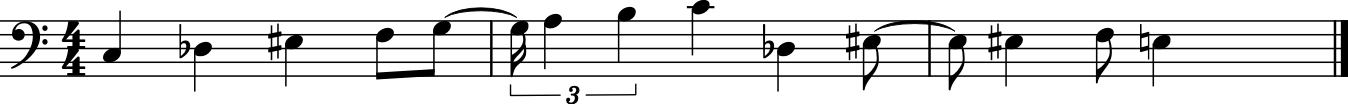

In [8]:
s = converter.parse('tinyNotation: 4/4 C4 D-4 E#4 F8 trip{G4 A4 B4} c4 D-4 E#4 E#4 F8 E4')
s.show()

In [ ]:
'C7 D-4 F8 F4 C4 E4 E6 trip{A4 B4 G4}'

In [13]:
s = converter.parse('tinyNotation: 4/4 C4 D-4 E#4 F8 trip{G4 C7 D-4} F8 F4 C4 E4 E6 trip{A4 B4 G4}')
s.show('midi')

# API fix

In [1]:
a = {
  "first_sequence": [
    [
      76,
      "8d"
    ],
    [
      77,
      "32"
    ],
    [
      79,
      "32"
    ],
    [
      72,
      "8"
    ],
    [
      74,
      "8"
    ],
    [
      74,
      "8"
    ],
    [
      77,
      "16"
    ],
    [
      76,
      "16"
    ]
  ]
}

In [2]:
a

{'first_sequence': [[76, '8d'],
  [77, '32'],
  [79, '32'],
  [72, '8'],
  [74, '8'],
  [74, '8'],
  [77, '16'],
  [76, '16']]}

In [5]:
import requests
p = "[[76, 8d],[77, 32],[79, 32],[72, 8],[74, 8],[74, 8],[77, 16],[76, 16]]"
response = requests.get("https://tmp-api-7wc6zc723a-ew.a.run.app/predict", params={'sequence': p}).json()
response

JSONDecodeError: [Errno Expecting value] Internal Server Error: 0

In [7]:
import requests
p = "[[76, '8d'],[77, '32'],[79, '32'],[72, '8'],[74, '8'],[74, '8'],[77, '16'],[76, '16']]"
response = requests.get("http://127.0.0.1:8000/predict", params={'sequence': p}).json()
response

{'predictions': [[74, '16'], [76, '8'], [75, '16']]}

In [8]:
import ast

[[76, '8d'],
 [77, '32'],
 [79, '32'],
 [72, '8'],
 [74, '8'],
 [74, '8'],
 [77, '16'],
 [76, '16']]

In [12]:
str([76, '8d'][1])

'8d'

In [13]:
len_in_64th_notes = {'64': 1, '32': 2, '32d': 3, '16': 4, '16d': 6, '8': 8, '8d': 12,
                     '8dd': 14, '4': 16, '4d': 24, '2': 32, '2d': 48, '1': 64}

In [14]:
len_in_64th_notes['8d']

12

In [15]:

pitch_symb = ['0',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92']
duration_symb = ['1', '16', '16d', '2', '2d', '32', '32d', '4', '4d', '64', '8', '8d', '8dd']

L_pitch_symb = len(pitch_symb)
L_duration_symb = len(duration_symb)

len_in_64th_notes = {'64': 1, '32': 2, '32d': 3, '16': 4, '16d': 6, '8': 8, '8d': 12,
                     '8dd': 14, '4': 16, '4d': 24, '2': 32, '2d': 48, '1': 64}
duration_mapping = {1: 9,
 2: 5,
 3: 6,
 4: 1,
 6: 2,
 8: 10,
 12: 11,
 14: 12,
 16: 7,
 24: 8,
 32: 3,
 48: 4,
 64: 0}
pitch_mapping = {0: 0,
 49: 1,
 50: 2,
 51: 3,
 52: 4,
 53: 5,
 54: 6,
 55: 7,
 56: 8,
 57: 9,
 58: 10,
 59: 11,
 60: 12,
 61: 13,
 62: 14,
 63: 15,
 64: 16,
 65: 17,
 66: 18,
 67: 19,
 68: 20,
 69: 21,
 70: 22,
 71: 23,
 72: 24,
 73: 25,
 74: 26,
 75: 27,
 76: 28,
 77: 29,
 78: 30,
 79: 31,
 80: 32,
 81: 33,
 82: 34,
 83: 35,
 84: 36,
 85: 37,
 86: 38,
 87: 39,
 88: 40,
 89: 41,
 90: 42,
 91: 43,
 92: 44}

duration_reverse_mapping = {0: 64,
 1: 4,
 2: 6,
 3: 32,
 4: 48,
 5: 2,
 6: 3,
 7: 16,
 8: 24,
 9: 1,
 10: 8,
 11: 12,
 12: 14}
reverse_len_in_64th_notes = {v: k for k, v in len_in_64th_notes.items()}
pitch_reverse_mapping = {0: 0,
 1: 49,
 2: 50,
 3: 51,
 4: 52,
 5: 53,
 6: 54,
 7: 55,
 8: 56,
 9: 57,
 10: 58,
 11: 59,
 12: 60,
 13: 61,
 14: 62,
 15: 63,
 16: 64,
 17: 65,
 18: 66,
 19: 67,
 20: 68,
 21: 69,
 22: 70,
 23: 71,
 24: 72,
 25: 73,
 26: 74,
 27: 75,
 28: 76,
 29: 77,
 30: 78,
 31: 79,
 32: 80,
 33: 81,
 34: 82,
 35: 83,
 36: 84,
 37: 85,
 38: 86,
 39: 87,
 40: 88,
 41: 89,
 42: 90,
 43: 91,
 44: 92}

In [ ]:


#-----convert the first sequence to list of notes----
lis_first_sequence = list(first_sequence)
first_input_sequence = []
for note in lis_first_sequence:
    note = note.split('-')
    note[0] = int(note[0])
    first_input_sequence.append(note)

In [16]:
list_sequence = "[[76, '8d'],[77, '32'],[79, '32'],[72, '8'],[74, '8'],[74, '8'],[77, '16'],[76, '16']]"
list_sequence = ast.literal_eval(list_sequence)
list_sequence

[[76, '8d'],
 [77, '32'],
 [79, '32'],
 [72, '8'],
 [74, '8'],
 [74, '8'],
 [77, '16'],
 [76, '16']]

In [25]:
input_sequence = []
for note in list_sequence:
    dur_len_in_64th_notes = len_in_64th_notes[str(note[1])]
    dur_mapped = duration_mapping[dur_len_in_64th_notes]
    pitch_mapped = pitch_mapping[note[0]]
    mapped_note = [pitch_mapped, dur_mapped]
    note_normalized = [mapped_note[0]/float(L_pitch_symb), mapped_note[1]/float(L_duration_symb)]
    input_sequence.append(note_normalized)

In [26]:
input_sequence

[[0.6222222222222222, 0.8461538461538461],
 [0.6444444444444445, 0.38461538461538464],
 [0.6888888888888889, 0.38461538461538464],
 [0.5333333333333333, 0.7692307692307693],
 [0.5777777777777777, 0.7692307692307693],
 [0.5777777777777777, 0.7692307692307693],
 [0.6444444444444445, 0.07692307692307693],
 [0.6222222222222222, 0.07692307692307693]]

In [27]:
sequence= "[[76, '8d'],[77, '32'],[79, '32'],[72, '8'],[74, '8'],[74, '8'],[77, '16'],[76, '16']]"

In [28]:
list_sequence = ast.literal_eval(sequence)

In [29]:
list_sequence

[[76, '8d'],
 [77, '32'],
 [79, '32'],
 [72, '8'],
 [74, '8'],
 [74, '8'],
 [77, '16'],
 [76, '16']]

In [5]:
import requests
res = requests.get("https://tmp-api-7wc6zc723a-ew.a.run.app/predict", params={"sequence": "[[76, '8d'],[77, '32'],[79, '32'],[72, '8'],[74, '8'],[74, '8'],[77, '16'],[76, '16']]"})
res.json()

{'predictions': [[74, '16'], [76, '8'], [75, '8']]}

In [ ]:
note_count = 5
temperature = 0.05  # randomness
note_choices = []
Music = []
notes_generated = []
sample = X_norm[0].reshape(1, length, 2)
for i in range(note_count):

    # return predictions from sample
    pitch_pred, duration_pred = prediction

    # apply randomness level to pitch
    pitch_pred[0] /= temperature

    # get 3 random (weighted) indexes from top 12 pitch logits
    pitch_index_top_12 = np.argpartition(pitch_pred[0], -12)[-12:]
    pitch_logits_top_12 = np.array([pitch_pred[0][i] for i in pitch_index_top_12]).reshape(-1, 12)
    pitch_3_logit_ind = np.array(random.categorical(pitch_logits_top_10, 3)).reshape(-1)
    pitch_index_top_3 = [pitch_index_top_12[i] for i in pitch_3_logit_ind]
    
    dur_index_top_2 = np.argpartition(duration_pred[0], -2)[-2:]  

    # return three notes as [pitch, duration] pairs
    three_notes = [[pitch, np.random.choice(dur_index_top_2)] for pitch in pitch_index_top_3]
    three_notes_mapped = [[pitch_reverse_mapping[pitch], duration_reverse_mapping[duration]] for pitch, duration in three_notes]    
    note_choices.append(three_notes_mapped)

    # prompt user to choose notes
    print(three_notes_mapped)
    choice = input('choose 0, 1, or 2:')

    # next note (user friendly)
    next_note = three_notes_mapped[int(choice)]
    Music.append(next_note)

    # next note (model friendly)
    next_note_mapped = [pitch_mapping[next_note[0]], duration_mapping[next_note[1]]]
    notes_generated.append(next_note_mapped)
    next_note_norm = [next_note_mapped[0] / float(L_pitch_symb), next_note_mapped[1] / float(L_duration_symb)]
    
    # update sample with next note
    sample = np.insert(sample[0], len(sample[0]), next_note_norm, axis=0)[1:].reshape(1, length, 2)

# numpy challenge

In [1]:
import numpy as np

In [8]:
array = np.random.randomint((100,8,2)) 

AttributeError: module 'numpy.random' has no attribute 'randomint'

In [13]:
import random
random.randint(1,100)

6

In [22]:
sequence = []
for i in range(100):
    sequence.append(notes)
    notes = []
    for y in range(8):
        note = []
        note.append(random.randint(60,100))
        note.append(random.randint(1,4))
        notes.append(note)

In [28]:
sequence

[[[86, 3], [94, 2], [83, 4], [100, 4], [72, 4], [76, 3], [95, 1], [79, 3]],
 [[86, 4], [71, 3], [95, 2], [68, 2], [90, 4], [98, 2], [74, 2], [94, 4]],
 [[96, 2], [72, 4], [100, 1], [78, 2], [85, 3], [62, 1], [77, 2], [87, 2]],
 [[66, 1], [88, 3], [98, 3], [89, 4], [99, 4], [77, 1], [78, 1], [100, 3]],
 [[81, 4], [68, 2], [63, 4], [96, 4], [95, 4], [60, 3], [99, 3], [84, 1]],
 [[60, 3], [79, 3], [65, 4], [71, 1], [72, 2], [80, 3], [93, 3], [92, 4]],
 [[76, 4], [90, 4], [79, 3], [78, 3], [69, 1], [81, 4], [75, 1], [78, 3]],
 [[94, 2], [94, 3], [63, 4], [100, 1], [61, 4], [73, 1], [88, 1], [87, 2]],
 [[62, 4], [64, 2], [63, 2], [68, 3], [93, 2], [83, 4], [100, 2], [83, 2]],
 [[99, 4], [84, 4], [93, 2], [91, 2], [86, 1], [96, 1], [88, 1], [65, 1]],
 [[65, 3], [88, 1], [70, 2], [83, 3], [98, 2], [86, 2], [93, 2], [60, 2]],
 [[82, 3], [92, 1], [73, 4], [76, 2], [93, 4], [94, 4], [77, 1], [79, 4]],
 [[62, 1], [68, 3], [66, 2], [97, 4], [89, 1], [86, 1], [78, 1], [67, 1]],
 [[91, 4], [75, 2], 

In [29]:
added = [[79, 2], [60, 4], [88, 4], [66, 1], [98, 2], [64, 1], [60, 2], [95, 1]]

In [31]:
sequence.append(added)

In [33]:
sequence_w_dup = sequence

In [34]:
sequence_w_dup = np.array(sequence_w_dup)

In [41]:
sequence_w_dup[0]

array([[ 86,   3],
       [ 94,   2],
       [ 83,   4],
       [100,   4],
       [ 72,   4],
       [ 76,   3],
       [ 95,   1],
       [ 79,   3]])

In [52]:
np.allclose(sequence_w_dup[99], sequence_w_dup[100])

True

In [85]:
import hashlib
hashlib.sha224(sequence_w_dup[99]).hexdigest()

'f402457dc09173e6647b314cee6dfd6dd24250e89ef31d45450c30c2'

In [94]:
hashlib.sha256(b).digest()

TypeError: object supporting the buffer API required

In [87]:
a = tuple(sequence_w_dup[99])

In [91]:
b = (1,2,3)

In [36]:
u, c = np.unique(sequence_w_dup, return_counts=True)
dup = u[c > 1]

In [37]:
dup

array([  1,   2,   3,   4,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100])

In [ ]:
#Same pair, Same sequence, same order

In [39]:
OrderedList(sequence_w_dup[0])

NameError: name 'OrderedList' is not defined